These transformations are done and the outputs will be saved tio /scratch folder because they should be on the whole cube instead of the subcubes. 

* Min-max scaling [0,1] 
* Min-max scaling [-1,1]
* standardizing -> (x - mean )/ stddev
* standardizing and scaling [0,1]
* standardizing and scaling [-1,1]
* square root transformation
* box-cox transformation
* box-cox transformation and scaling [0,1]
* box-cox transformation and scaling [-1,1]
* box-cox transformation and standardizing
* standardizing and box-cox transformation
* reciprocal transformation and scaling [0,1]
* reciprocal transformation and scaling [-1,1]

In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

/share/apps/python3/3.6.3/intel/lib/python3.6/site-packages/h5py-2.7.1-py3.6-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datapath=''
redshift = '0.0'
f = h5py.File(datapath+'fields_z='+redshift+'.hdf5', 'r')
f=f['delta_HI']

# Helper Functions

## Get max of whole cube

In [3]:
def get_max_cube(f):
    max_list = [np.max(f[i:i+1,:,:]) for i in range(f.shape[0])]
    max_cube = max(max_list)
    return max_cube

max_cube = get_max_cube(f = f)
max_cube

18153447000.0

## Get min of whole cube

In [4]:
def get_min_cube(f):
    min_list = [np.min(f[i:i+1,:,:]) for i in range(f.shape[0])]
    min_cube = min(min_list)
    return min_cube

min_cube = get_min_cube(f = f)
min_cube

0.0

## Get mean of whole cube

In [5]:
def get_mean_cube(f):
    mean_list = [np.mean(f[i:i+1,:,:]) for i in range(f.shape[0])]
    mean_cube = np.mean(mean_list)
    return mean_cube

mean_cube = get_mean_cube(f = f)
mean_cube

10170.682

## Get stddev of whole cube

In [6]:
def get_stddev_cube(f, mean_cube):
    variance_list = [np.mean(np.square(f[i:i+1,:,:] - mean_cube))\
                     for i in range(f.shape[0])]
    stddev_cube = np.sqrt(np.mean(variance_list))
    return stddev_cube

stddev_cube = get_stddev_cube(f = f, mean_cube = mean_cube)
stddev_cube

3474200.8

# Min-Max Scaling [0,1]

In [7]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [8]:
whole_new_f[0:1,:,:].shape

(1, 2048, 2048)

#### Transform

In [14]:
transform_sample = whole_new_f[:100,:100,:100]
f_sample = f[:100,:100,:100]

In [15]:
for i in range(transform_sample.shape[0]):
    transform_sample[i:i+1,:,:] = (f_sample[i:i+1,:,:] - min_cube)/(max_cube-min_cube)

In [16]:
transform_sample[0,:,:]

array([[0.00000000e+00, 0.00000000e+00, 4.84346200e-12, ...,
        1.19119688e-12, 2.72229244e-12, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.34353487e-12, 5.35577832e-12, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.27854888e-12, 1.06524329e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.79546031e-11, 5.19321131e-12]])

In [17]:
print(transform_sample.shape)
print(transform_sample.mean())
print(transform_sample.min())
print(transform_sample.max())

(100, 100, 100)
1.5126075564352275e-08
0.0
0.004612286109477282


#### Inverse Transform

In [18]:
inverse_transform_f = np.empty(shape=(transform_sample.shape[0],
                                     transform_sample.shape[1],
                                     transform_sample.shape[2]),
                              dtype=np.float64)

(100, 100, 100)

In [19]:
for i in range(transform_sample.shape[0]):
    inverse_transform_f[i:i+1,:,:] = transform_sample[i:i+1,:,:]*(max_cube - min_cube) + min_cube

In [20]:
## check if same as f_sample
print(inverse_transform_f.shape)
print(inverse_transform_f.mean())
print(inverse_transform_f.min())
print(inverse_transform_f.max())

(100, 100, 100)
274.59041748892014
0.0
83728893.39284134


In [22]:
# f sample
print(f_sample.shape)
print(f_sample.mean())
print(f_sample.min())
print(f_sample.max())

(100, 100, 100)
274.5904
0.0
83728900.0


In [23]:
def inverse_min_max_01(transformed_cube):
    """Takes as input a 0-1 Scaled cube,
    reverts the transformation, returns the
    inverse-transformed cube"""
    inversed = transformed_cube*(max_cube - min_cube) + min_cube
    return inversed

#### Write Transformed File

In [ ]:
hf = h5py.File('minmax_scale_01_redshift1.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

#### Write Inverse Transformed File

In [ ]:
hf = h5py.File('inverse_minmax_scale_01_redshift1.h5', 'w')
hf.create_dataset('delta_HI', data=inverse_transform_f)
hf.close()

# Min-Max Scaling [-1,1]

In [24]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [25]:
transform_sample = whole_new_f[:100,:100,:100]
f_sample = f[:100,:100,:100]

#### Transformation

In [26]:
for i in range(f_sample.shape[0]):
    transform_sample[i:i+1,:,:] = 2* (f_sample[i:i+1,:,:] - min_cube)/(max_cube-min_cube) - 1

In [27]:
get_stddev_cube(f=transform_sample, mean_cube=mean_cube)

10171.681640594772

In [28]:
print(transform_sample.shape)
print(transform_sample.mean())
print(transform_sample.min())
print(transform_sample.max())

(100, 100, 100)
-0.9999999697710276
-1.0
-0.9907754063606262


#### Inverse Transformation

In [29]:
inverse_transform_f = np.empty(shape=(transform_sample.shape[0],
                                     transform_sample.shape[1],
                                     transform_sample.shape[2]),
                              dtype=np.float64)

(100, 100, 100)

In [30]:
for i in range(transform_sample.shape[0]):
    inverse_transform_f[i:i+1,:,:] = 0.5*(1+transform_sample[i:i+1,:,:])*(max_cube - min_cube) + min_cube

In [31]:
print(inverse_transform_f.shape)
print(inverse_transform_f.mean())
print(inverse_transform_f.min())
print(inverse_transform_f.max())

(100, 100, 100)
274.3800308901367
0.0
83729087.82006836


In [32]:
# f sample
print(f_sample.shape)
print(f_sample.mean())
print(f_sample.min())
print(f_sample.max())

(100, 100, 100)
274.5904
0.0
83728900.0


In [52]:
def inverse_neg1(transformed_cube):
    """Takes as input a -11 Scaled cube,
    reverts the transformation, returns the
    inverse-transformed cube"""
    inversed = 0.5*(1+transformed_cube)*(max_cube - min_cube) + min_cube
    return inversed

In [12]:
# hf = h5py.File('minmax_scale_neg11_redshift1.h5', 'w')
# hf.create_dataset('delta_HI', data=whole_new_f)
# hf.close()

In [ ]:
## save inverse transform


In [26]:
datapath=''
f_neg1_1 = h5py.File('minmax_scale_neg11_redshift1.h5', 'r')
f_neg1_1 = f_neg1_1["delta_HI"]

In [30]:
f_neg1_1.ndim

0

# Standardizing

In [34]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [35]:
transform_sample = whole_new_f[:100,:100,:100]
f_sample = f[:100,:100,:100]

#### Transform

In [36]:
for i in range(f_sample.shape[0]):
    transform_sample[i:i+1,:,:] = (f_sample[i:i+1,:,:] - mean_cube)/ stddev_cube

In [37]:
print(transform_sample.shape)
print(transform_sample.mean())
print(transform_sample.min())
print(transform_sample.max())

(100, 100, 100)
-0.0028484511779599125
-0.0029274881817400455
24.09726333618164


#### Inverse Transform

In [38]:
for i in range(transform_sample.shape[0]):
    inverse_transform_f[i:i+1,:,:] = transform_sample[i:i+1,:,:]*stddev_cube + mean_cube

In [39]:
print(inverse_transform_f.shape)
print(inverse_transform_f.mean())
print(inverse_transform_f.min())
print(inverse_transform_f.max())

(100, 100, 100)
274.5904218182887
4.007597453892231e-06
83728901.03715038


In [40]:
# f sample
print(f_sample.shape)
print(f_sample.mean())
print(f_sample.min())
print(f_sample.max())

(100, 100, 100)
274.5904
0.0
83728900.0


In [20]:
hf = h5py.File('standardized_redshift1.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

In [31]:
std_f = h5py.File('standardized_redshift1.h5', 'r')
std_f = std_f["delta_HI"]

In [34]:
std_f.shape

(2048, 2048, 2048)

In [64]:
np.random.choice([2,3,7,7])

7

In [71]:
a = [3,4,5]
a.remove(3)

In [72]:
a

[4, 5]

### Helper Funcs

In [122]:
def without_replacement(edge, choice):
    edge_list = [*range(edge)]
#     print (edge_list)
    choice_list = []
    
    for i in range(choice):
        select = np.random.choice(edge_list)
        edge_list.remove(select)
        choice_list.append(select)
        
    return choice_list

In [123]:
def select_cube_indices(cube, choice):
    cube_indices = []
    
    edge = cube.shape[0]
    dim_list_1, dim_list_2, dim_list_3 = without_replacement(edge, choice),\
    without_replacement(edge, choice), without_replacement(edge, choice) 
    
    for i in range(choice):
        cube_indices.append([dim_list_1[i],
                            dim_list_2[i],
                            dim_list_3[i]])
        
    return cube_indices

In [128]:
selected_indices = select_cube_indices(std_f, 1000)
print ("selected indices done!")

flat_cube_elements = [std_f[selected_indices[i][0],
                                    selected_indices[i][1],
                                    selected_indices[i][2]] for i in range(len(selected_indices))]


selected indices done!


# Square Root Transformation

Might also try 1/4 or 1/8 root

In [43]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)

print(whole_new_f.shape)

transform_sample = whole_new_f[:100,:100,:100]
f_sample = f[:100,:100,:100]

shift = 1.0

for i in range(f_sample.shape[0]):
    if i % 250 == 0:
        print(str(i) + " / " + str(f_sample.shape[0]))
#     whole_new_f[i:i+1,:,:] = np.sqrt(f[i:i+1,:,:] + shift)
    transform_sample[i:i+1,:,:] = np.power(f_sample[i:i+1,:,:] + shift, 1/8)

# shift = 1.0

# for i in range(f.shape[0]):
#     if i % 250 == 0:
#         print(str(i) + " / " + str(f.shape[0]))
# #     whole_new_f[i:i+1,:,:] = np.sqrt(f[i:i+1,:,:] + shift)
#     whole_new_f[i:i+1,:,:] = np.power(f[i:i+1,:,:] + shift, 1/8)
    
print(transform_sample.mean())
print(transform_sample.min())
print(transform_sample.max())

(2048, 2048, 2048)
0 / 100
1.0125234282354116
1.0
9.780463218688965


In [46]:
# transform_sample = whole_new_f[:100,:100,:100]
# f_sample = f[:100,:100,:100]

shift = 1.0

inverse_transform_f = np.empty(shape=(transform_sample.shape[0],
                                     transform_sample.shape[1],
                                     transform_sample.shape[2]),
                              dtype=np.float64)

for i in range(f_sample.shape[0]):
    if i % 250 == 0:
        print(str(i) + " / " + str(f.shape[0]))
#     whole_new_f[i:i+1,:,:] = np.sqrt(f[i:i+1,:,:] + shift)
    inverse_transform_f[i:i+1,:,:] = np.power(transform_sample[i:i+1,:,:],8) -1

print ("Inverse Transform" + "\n")
print(inverse_transform_f.shape)
print(inverse_transform_f.mean())
print(inverse_transform_f.min())
print(inverse_transform_f.max())
print ("\n")

print ("F Sample" + "\n")
print(f_sample.shape)
print(f_sample.mean())
print(f_sample.min())
print(f_sample.max())

0 / 2048
Inverse Transform

(100, 100, 100)
274.59043993994896
0.0
83728900.48745306


F Sample

(100, 100, 100)
274.5904
0.0
83728900.0


In [53]:
def inverse_sqrt(transformed_cube, shift, power):
    """Takes as input a squareroot transformed and shifted
    cube, the shift amount, and the degree (power) of transformation.
    Reverts the transformation,
    
    Returns the original cube"""
    
    inverse_transform_f = np.empty(shape=(transform_sample.shape[0],
                                     transform_sample.shape[1],
                                     transform_sample.shape[2]),
                              dtype=np.float64)
    
    s = shift

    for i in range(transformed_cube.shape[0]):
        inverse_transform_f[i:i+1,:,:] = np.power(transformed_cube[i:i+1,:,:],power) - s
        
    return inverse_transform_f

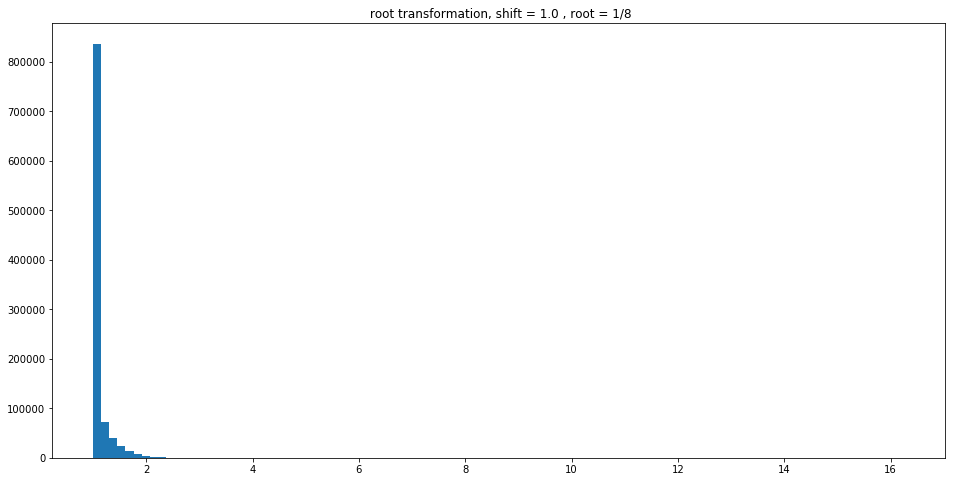

In [11]:
plt.figure(figsize=(16,8))
plt.title(" root transformation, shift = " + str(shift) + \
             " , root = " + str("1/8"))
_ = plt.hist(whole_new_f[500:600,500:600,500:600].flatten(),
             bins = 100)

# Reciprocal Transformation

This has the problem of 0 in the denominator.

Solved by shifting positively (probably +1).

In [48]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
print(whole_new_f.shape)

transform_sample = whole_new_f[:100,:100,:100]
f_sample = f[:100,:100,:100]

shift = 1.0

# for i in range(f.shape[0]):
#     if i % 250 == 0:
#         print(str(i) + " / " + str(f.shape[0]))
#     whole_new_f[i:i+1,:,:] = 1 / (f[i:i+1,:,:] + shift)
    
for i in range(f_sample.shape[0]):
    transform_sample[i:i+1,:,:] = 1 / (f_sample[i:i+1,:,:] + shift)
    
print(transform_sample.mean())
print(transform_sample.min())
print(transform_sample.max())

(2048, 2048, 2048)
0.9327123412598826
1.1943307676176573e-08
1.0


In [50]:
# whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
#                        dtype = np.float64)
# print(whole_new_f.shape)

## INVERSE TRANSFORM 
shift = 1.0

inverse_transform_f = np.empty(shape=(transform_sample.shape[0],
                                     transform_sample.shape[1],
                                     transform_sample.shape[2]),
                              dtype=np.float64)

for i in range(transform_sample.shape[0]):
    inverse_transform_f[i:i+1,:,:] = np.power(transform_sample[i:i+1,:,:],-1) - shift
    
print ("Inverse Transform" + "\n")
print(inverse_transform_f.shape)
print(inverse_transform_f.mean())
print(inverse_transform_f.min())
print(inverse_transform_f.max())
print ("\n")

print ("F Sample" + "\n")
print(f_sample.shape)
print(f_sample.mean())
print(f_sample.min())
print(f_sample.max())

Inverse Transform

(100, 100, 100)
274.5904201585627
0.0
83728897.82044229


F Sample

(100, 100, 100)
274.5904
0.0
83728900.0


In [54]:
def inverse_reciprocal(transformed_cube, shift):
    """Takes as input:
    - A reciprocal-transformed cube (transformed_cube) and
    - The amount of shift applied (shift),
    
    - Reverts the transformation
    
    Returns:
    - Inverse transformed (original) cube"""
    
    inverse_transform_f = np.empty(shape=(transform_sample.shape[0],
                                     transform_sample.shape[1],
                                     transform_sample.shape[2]),
                              dtype=np.float64)
    
    for i in range(transformed_cube.shape[0]):
        inverse_transform_f[i:i+1,:,:] = np.power(transformed_cube[i:i+1,:,:],-1) - shift
        
    return inverse_transform_f
    

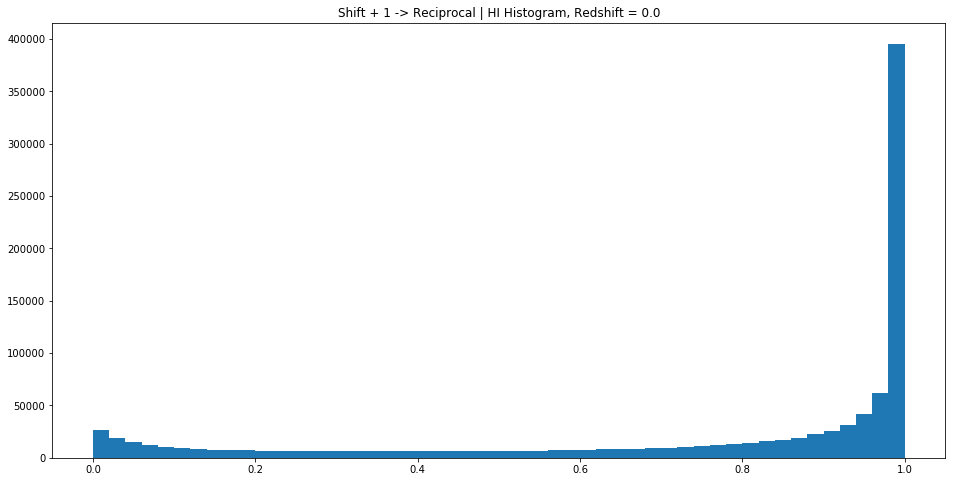

In [6]:
plt.figure(figsize=(16,8))
plt.title("Shift + 1 -> Reciprocal | HI Histogram, Redshift = " + str(redshift))
_ = plt.hist(whole_new_f[500:600,500:600,500:600].flatten(), bins = 50)

In [ ]:
hf = h5py.File('reciprocal_shift1_redshift0.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

# Box Cox Transformations

In [ ]:
#102918, SB

In [59]:
%run get_samples.py

In [60]:
def get_lambda_boxcox(subcube, shift):
    
#     flat_cube = trial_sample[0].flatten()
    flat_cube = subcube.flatten()
    
    # shifting with a positive constant to flat_cube for positiveness constraint
    flat_cube = flat_cube + shift
    
    xt, maxlog, interval = stats.boxcox(flat_cube, alpha=0.05)
    print("lambda = {:g}".format(maxlog))
    
    return maxlog

In [69]:
no_subcube = 500
shift = 1.0

testcd = define_test(s_test = 1024,s_train = 128)
print(testcd)

maxlog_list = []

# get a random subcubes
trial_sample = get_samples(s_sample = 128, 
                        nsamples = no_subcube, 
                        h5_filename = "fields_z=1.0.hdf5", 
                        test_coords = testcd)
#     trial_sample[0].shape

for i in range(no_subcube):

    maxlog = get_lambda_boxcox(subcube = trial_sample[i],
                               shift = shift)
    maxlog_list.append(maxlog)



{'x': [512, 1536], 'y': [384, 1408], 'z': [1024, 2048]}
Sampling finished.
Counter = 1 / 500
Counter = 2 / 500
Counter = 3 / 500
Counter = 4 / 500
Counter = 5 / 500
Counter = 6 / 500
Counter = 7 / 500
Counter = 8 / 500
Counter = 9 / 500
Counter = 10 / 500
Counter = 11 / 500
Counter = 12 / 500
Counter = 13 / 500
Counter = 14 / 500
Counter = 15 / 500
Counter = 16 / 500
Counter = 17 / 500
Counter = 18 / 500
Counter = 19 / 500
Counter = 20 / 500
Counter = 21 / 500
Counter = 22 / 500
Counter = 23 / 500
Counter = 24 / 500
Counter = 25 / 500
Counter = 26 / 500
Counter = 27 / 500
Counter = 28 / 500
Counter = 29 / 500
Counter = 30 / 500
Counter = 31 / 500
Counter = 32 / 500
Counter = 33 / 500
Counter = 34 / 500
Counter = 35 / 500
Counter = 36 / 500
Counter = 37 / 500
Counter = 38 / 500
Counter = 39 / 500
Counter = 40 / 500
Counter = 41 / 500
Counter = 42 / 500
Counter = 43 / 500
Counter = 44 / 500
Counter = 45 / 500
Counter = 46 / 500
Counter = 47 / 500
Counter = 48 / 500
Counter = 49 / 500
Cou

Counter = 415 / 500
Counter = 416 / 500
Counter = 417 / 500
Counter = 418 / 500
Counter = 419 / 500
Counter = 420 / 500
Counter = 421 / 500
Counter = 422 / 500
Counter = 423 / 500
Counter = 424 / 500
Counter = 425 / 500
Counter = 426 / 500
Counter = 427 / 500
Counter = 428 / 500
Counter = 429 / 500
Counter = 430 / 500
Counter = 431 / 500
Counter = 432 / 500
Counter = 433 / 500
Counter = 434 / 500
Counter = 435 / 500
Counter = 436 / 500
Counter = 437 / 500
Counter = 438 / 500
Counter = 439 / 500
Counter = 440 / 500
Counter = 441 / 500
Counter = 442 / 500
Counter = 443 / 500
Counter = 444 / 500
Counter = 445 / 500
Counter = 446 / 500
Counter = 447 / 500
Counter = 448 / 500
Counter = 449 / 500
Counter = 450 / 500
Counter = 451 / 500
Counter = 452 / 500
Counter = 453 / 500
Counter = 454 / 500
Counter = 455 / 500
Counter = 456 / 500
Counter = 457 / 500
Counter = 458 / 500
Counter = 459 / 500
Counter = 460 / 500
Counter = 461 / 500
Counter = 462 / 500
Counter = 463 / 500
Counter = 464 / 500


lambda = -1.79635
lambda = -1.94051
lambda = -1.18745
lambda = -1.72541
lambda = -2.7308
lambda = -2.01892
lambda = -4.62111
lambda = -1.71506
lambda = -2.09299
lambda = -1.55421
lambda = -2.1974
lambda = -2.57917
lambda = -1.81774
lambda = -5.7553
lambda = -2.61655
lambda = -3.52776
lambda = -1.82384
lambda = -1.7242
lambda = -4.11142
lambda = -1.55143
lambda = -5.16416
lambda = -1.72469
lambda = -2.16825
lambda = -2.13644
lambda = -2.05779
lambda = -1.55485
lambda = -1.36352
lambda = -2.46737
lambda = -4.23126
lambda = -1.4146
lambda = -3.38055
lambda = -1.66608
lambda = -1.30582
lambda = -1.46863
lambda = -2.82136
lambda = -2.16715
lambda = -3.16408
lambda = -1.39374
lambda = -1.55708
lambda = -1.6027
lambda = -1.60646
lambda = -1.35427
lambda = -2.07207
lambda = -1.99521
lambda = -1.50195
lambda = -4.86052
lambda = -2.04193
lambda = -2.48096
lambda = -2.06099
lambda = -1.92113
lambda = -2.0676
lambda = -1.62748
lambda = -4.52927
lambda = -1.99667
lambda = -2.28523
lambda = -1.98745

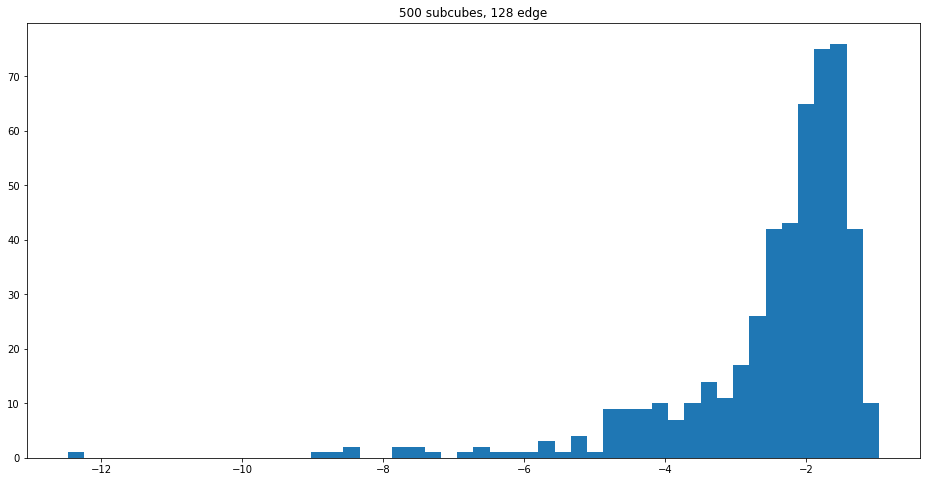

In [71]:
plt.figure(figsize=(16,8))
plt.rcParams["font.size"] = 16
plt.title("500 subcubes, 128 edge")
_ = plt.hist(maxlog_list, bins = 50)

Using the best estimation for the lambda to convert the whole cube:

In [74]:
print(np.median(np.array(maxlog_list)))
print(np.array(maxlog_list).mean())

-2.054718380766178
-2.4869664835481404


In [76]:
best_lambda = np.median(np.array(maxlog_list))
best_lambda

-2.054718380766178

In [87]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [88]:
i = 0

def boxcox_transform(f_wall):
    
#     flat_cube = f[i:i+1,:,:]
    flat_cube = f_wall
    # flat_cube = flat_cube.flatten()
    flat_cube = flat_cube + shift
#     print(len(flat_cube))

    xt = stats.boxcox(flat_cube, lmbda = best_lambda)
#     print(xt.shape)
    
    return xt

boxcox_transform(f_wall = f[i:i+1,:,:])

array([[[0.01423424, 0.        , 0.        , ..., 0.        ,
         0.        , 0.15768795],
        [0.        , 0.15960725, 0.06340617, ..., 0.        ,
         0.22577764, 0.03414862],
        [0.01606615, 0.05065046, 0.01761026, ..., 0.        ,
         0.09053455, 0.01176273],
        ...,
        [0.        , 0.        , 0.0049104 , ..., 0.        ,
         0.        , 0.        ],
        [0.18112671, 0.07281356, 0.02402313, ..., 0.1032445 ,
         0.        , 0.        ],
        [0.09171937, 0.02912485, 0.        , ..., 0.03091806,
         0.        , 0.14065303]]], dtype=float32)

In [89]:
for i in range(f.shape[0]):
    if i % 250 == 0:
        print(str(i) + " / " + str(f.shape[0]))
    
    whole_new_f[i:i+1,:,:] = boxcox_transform(f_wall = f[i:i+1,:,:])
    

In [90]:
print(whole_new_f.shape)
print(whole_new_f.mean())
print(whole_new_f.min())
print(whole_new_f.max())

(2048, 2048, 2048)
0.13956263593612545
0.0
0.4866846799850464


In [93]:
hf = h5py.File('boxcox_' + "{0:.2f}".format(best_lambda) + \
               'lambda_redshift1.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

#### Sampling a subcube and looking at the distribution

In [100]:
no_subcube = 1

testcd = define_test(s_test = 1024,s_train = 128)
print(testcd)

# get a random subcubes
trial_sample = get_samples(s_sample = 128, 
                        nsamples = 1, 
                        h5_filename = "boxcox_-2.05lambda_redshift1.h5", 
                        test_coords = testcd)
trial_sample[0].shape

{'x': [256, 1280], 'y': [128, 1152], 'z': [768, 1792]}
Sampling finished.
Counter = 1 / 1


(128, 128, 128)

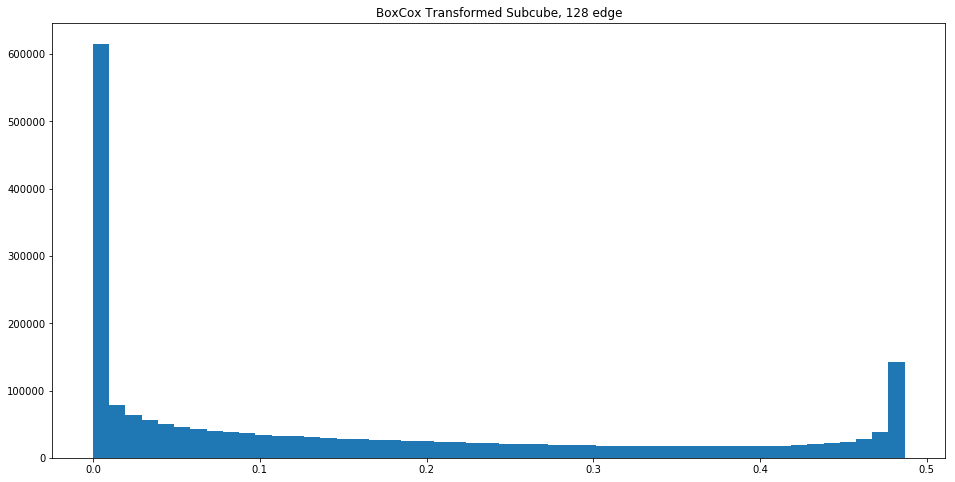

In [101]:
plt.figure(figsize=(16,8))
plt.title("BoxCox Transformed Subcube, 128 edge")
_ = plt.hist(trial_sample[0].flatten(), bins = 50)

# Inverse Hyperbolic Sine Transformation

In [15]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [10]:
# min_cube = get_min_cube(f=f)
# max_cube = get_max_cube(f=f)

In [11]:
# def arcsinh_cube(cube=f,
#             scale=True,
#             min_cube = 0,
#              max_cube = 0):
#     """scale can be false with arcsinh. 
#     Convert it to True by definition if you want to use 
#     only arcsin but not arcsinh!"""

#     flat_cube = cube.flatten()
#     arcsinh_cube = np.arcsinh(flat_cube)
    
#     if scale == True:
#         arcsinh_cube = (arcsinh_cube - min_cube)/(max_cube - min_cube)
#     else:
#         arcsinh_cube = arcsinh_cube
#     return arcsinh_cube

In [16]:
def inverse_hyperbolic_sine(f_wall,theta=1.0):
    
    assert theta > 0, "theta should be positive"
    theta = float(theta)
    
    f_wall = np.log(theta*f_wall \
                     + ((theta*f_wall)**2 + 1)**(1/2)) / theta
    
    return f_wall

In [17]:
theta = 1000000.0

for i in range(f.shape[0]):
    if i % 250 == 0:
        print(str(i) + " / " + str(f.shape[0]))
    whole_new_f[i:i+1,:,:] = inverse_hyperbolic_sine(f_wall = f[i:i+1,:,:],
                                                     theta = theta)

0 / 2048
250 / 2048
500 / 2048
750 / 2048
1000 / 2048
1250 / 2048
1500 / 2048
1750 / 2048
2000 / 2048


In [18]:
print(whole_new_f.shape)
print(whole_new_f.mean())
print(whole_new_f.min())
print(whole_new_f.max())

(2048, 2048, 2048)
7.2306020087881925e-06
0.0
3.813078365055844e-05


### ihs != arcsinh:

In [18]:
ihs_cube = arcsinh_cube(cube=np.array(f), 
                      scale=True,
                      min_cube = min_cube,
                      max_cube = max_cube)
ihs_cube[12314]

2.155691e-12

In [20]:
random_point = np.array(f).flatten()[12314]
theta = 1
random_point = np.log(random_point + (random_point**2 + 1)**(1/2))
random_point

0.03913322321203934

### Histogram

Text(0.5,1,'IHS - Transformed Cube theta = 1000000.0')

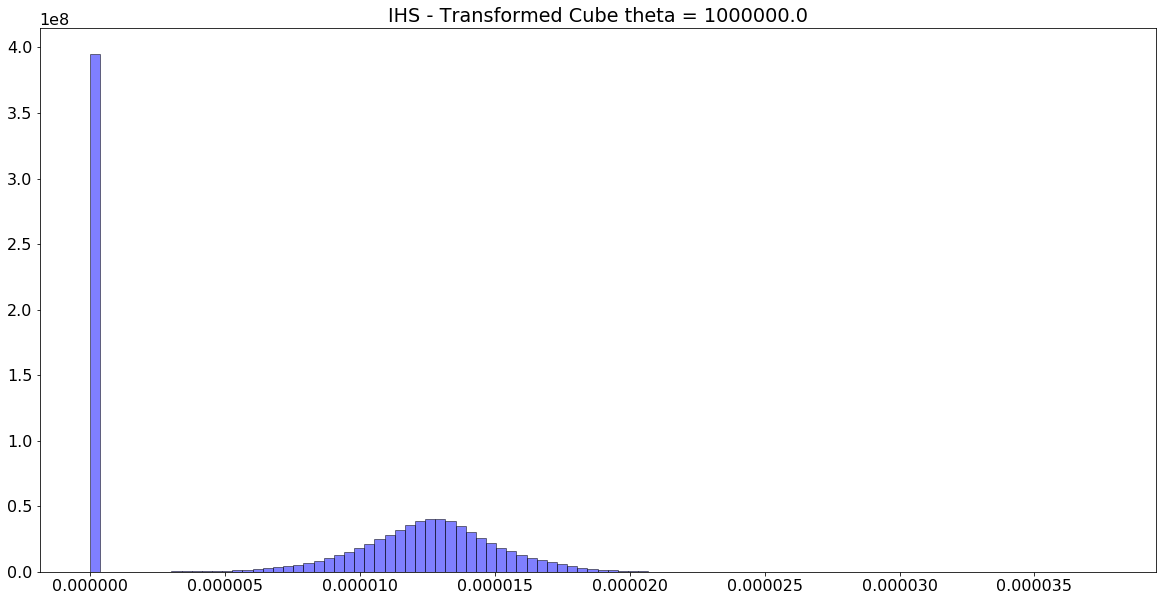

In [20]:
plt.figure(figsize=(20,10))
plt.hist(whole_new_f[:1000,:1000,:1000].flatten(),
         color="b",
         alpha=0.5, 
         edgecolor="k",
         bins = 100)
plt.rcParams["font.size"] = 16
plt.title("IHS - Transformed Cube " + "theta = " + str(theta))
# plt.xlim(-1e-2,5)

### Writing to File

In [9]:
hf = h5py.File('ihs_' + "{0:.2f}".format(theta) + \
               'theta_redshift0.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

NameError: name 'theta' is not defined

# Over Density

Formula can be found in Trello.

In [21]:
whole_new_f = np.empty(shape = (f.shape[0],f.shape[1],f.shape[2]),
                       dtype = np.float64)
whole_new_f.shape

(2048, 2048, 2048)

In [23]:
mean_cube

10170.682

In [24]:
max_cube

18153447000.0

In [25]:
for i in range(f.shape[0]):
    if i % 250 == 0:
        print(str(i) + " / " + str(f.shape[0]))
    # without sclaing to [0,1]
#     whole_new_f[i:i+1,:,:] = (f[i:i+1,:,:] / mean_cube) - 1

    # with scaling to [0,1]
    whole_new_f[i:i+1,:,:] = (f[i:i+1,:,:] / max_cube / mean_cube) - 1

0 / 2048
250 / 2048
500 / 2048
750 / 2048
1000 / 2048
1250 / 2048
1500 / 2048
1750 / 2048
2000 / 2048


In [26]:
print(whole_new_f.shape)
print(whole_new_f.mean())
print(whole_new_f.min())
print(whole_new_f.max())

(2048, 2048, 2048)
-0.9999999999466826
-1.0
-0.9999016523361206


In [ ]:
plt.figure(figsize=(16,8))
plt.title("Overdensity of HI Histogram, Redshift = " + str(redshift))
_ = plt.hist(whole_new_f.flatten(), bins = 50)

In [3]:
hf = h5py.File('overdensity_redshift0.h5', 'w')
hf.create_dataset('delta_HI', data=whole_new_f)
hf.close()

NameError: name 'whole_new_f' is not defined